## Infrence on dataset for panoptic

In [1]:
from detectron2.utils.logger import setup_logger
from detectron2.data import MetadataCatalog, DatasetCatalog
setup_logger()

train_json = "./annotations/train_panoptic.json"
panoptic_json = "/home/wenisch/Atom360/AI/Learning/data/panoptic_annotations_trainval2017(1)/annotations/panoptic_train2017.json"
image_root = "/home/wenisch/Atom360/AI/Learning/data/dataset/images"
panoptic_root = "panoptic"
logger = setup_logger(name=__name__)

# # COCO classes
# CLASSES = [ #'N/A', 
#     'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
#     'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
#     'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
#     'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
#     'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
#     'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
#     'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
#     'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
#     'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
#     'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
#     'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
#     'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
#     'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
#     'toothbrush'
# ]

CLASSES = []

/home/wenisch/anaconda3/envs/detectron/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from detectron2.data.datasets import register_coco_instances

# MetadataCatalog.get("dataset_test").set(thing_classes= CLASSES)
meta_test = MetadataCatalog.get("dataset_test")
print("Meta test is :"+ str(meta_test.as_dict()))
# register_coco_instances("dataset_test", meta_test.as_dict(), train_json, image_root)
register_coco_instances("dataset_test", meta_test.as_dict(), panoptic_json, panoptic_root)

Meta test is :{'name': 'dataset_test'}


## Panoptic

In [3]:
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer
from detectron2.data.datasets.coco_panoptic import load_coco_panoptic_json
import detectron2.data.datasets  # noqa # add pre-defined metadata
import sys
from PIL import Image
import numpy as np
logger = setup_logger(name=__name__)
# assert "dataset_test" in DatasetCatalog.list()
meta = MetadataCatalog.get("dataset_test")
dicts = load_coco_panoptic_json(panoptic_json, image_root, panoptic_root, meta.as_dict())
logger.info("Done loading {} samples.".format(len(dicts)))
dirname = "coco-data-vis"
os.makedirs(dirname, exist_ok=True)
num_imgs_to_vis = int(sys.argv[5])
for i, d in enumerate(dicts):
    img = np.array(Image.open(d["file_name"]))
    visualizer = Visualizer(img, metadata=meta)
    vis = visualizer.draw_dataset_dict(d)
    fpath = os.path.join(dirname, os.path.basename(d["file_name"]))
    vis.save(fpath)
    if i + 1 >= num_imgs_to_vis:
        break

KeyError: 'thing_dataset_id_to_contiguous_id'

In [4]:
meta.as_dict()


{'name': 'dataset_test',
 'json_file': '/home/wenisch/Atom360/AI/Learning/data/panoptic_annotations_trainval2017(1)/annotations/panoptic_train2017.json',
 'image_root': 'panoptic',
 'evaluator_type': 'coco'}

In [7]:
# import io
# from copy import deepcopy
# img = transform(im).unsqueeze(0)
# out = model(img)
# result = postprocessor(out, torch.as_tensor(img.shape[-2:]).unsqueeze(0))[0]
# # We extract the segments info and the panoptic result from DETR's prediction
# segments_info = deepcopy(result["segments_info"])
# # Panoptic predictions are stored in a special format png
# panoptic_seg = Image.open(io.BytesIO(result['png_string']))
# final_w, final_h = panoptic_seg.size
# # We convert the png into an segment id map
# panoptic_seg = np.array(panoptic_seg, dtype=np.uint8)
# panoptic_seg = torch.from_numpy(rgb2id(panoptic_seg))

dataset_dicts_val = DatasetCatalog.get("dataset_test")
# noneobjects = 0
# meta = MetadataCatalog.get("coco_2017_val_panoptic_separated")
for i in range(len(segments_info)):
    c = segments_info[i]["category_id"]
    segments_info[i]["category_id"] = meta.thing_dataset_id_to_contiguous_id[c] if segments_info[i]["isthing"] else meta.stuff_dataset_id_to_contiguous_id[c]

for d in random.sample(dataset_dicts_val, 3):
    img = cv2.imread(d["file_name"])
    print(d)
    break
    # Finally we visualize the prediction
    v = Visualizer(np.array(img[:, :, ::-1].copy().resize((final_w, final_h)))[:, :, ::-1], meta, scale=1.0)
    v._default_font_size = 20
    v = v.draw_panoptic_seg_predictions(panoptic_seg, segments_info, area_threshold=0)
    plt.imshow(v.get_image())

KeyError: 'id'

In [ ]:




    
    
# Detectron2 uses a different numbering of coco classes, here we convert the class ids accordingly
meta = MetadataCatalog.get("coco_2017_val_panoptic_separated")
for i in range(len(segments_info)):
    c = segments_info[i]["category_id"]
    segments_info[i]["category_id"] = meta.thing_dataset_id_to_contiguous_id[c] if segments_info[i]["isthing"] else meta.stuff_dataset_id_to_contiguous_id[c]



## Instance

In [3]:
import os, json, cv2, random
from detectron2.utils.visualizer import Visualizer
from matplotlib import pyplot as plt

dataset_dicts_val = DatasetCatalog.get("dataset_test")
noneobjects = 0

for d in random.sample(dataset_dicts_val, 3):
    img = cv2.imread(d["file_name"])
    if img is not None:
        visualizer = Visualizer(img[:, :, ::-1], metadata=meta_test, scale=1)
        out = visualizer.draw_dataset_dict(d)
        #cv2_imshow(out.get_image()[:, :, ::-1])
        plt.imshow(out.get_image())
    else:
        noneobjects += 1
        print("File missing"+ d["file_name"])
print("Number of Missing files ", noneobjects)

KeyError: 'id'

In [5]:
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

model_final_cafdb1.pkl: 261MB [19:52, 219kB/s]                                


/home/reuben/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


['spoon', 'carrot']
['spoon', 'hot dog']
['baseball bat', 'spoon', 'apple']


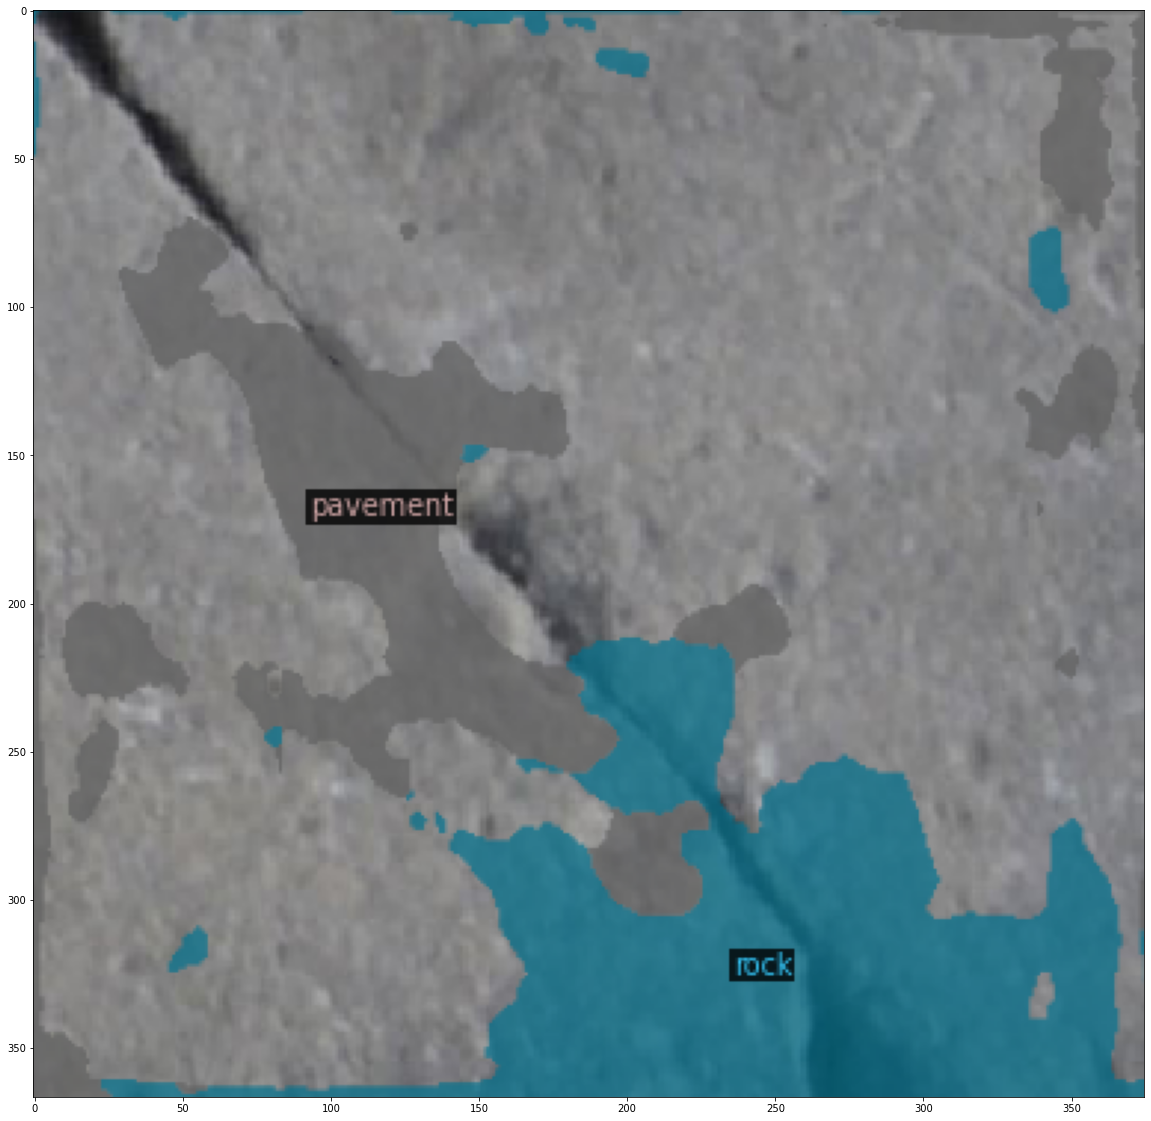

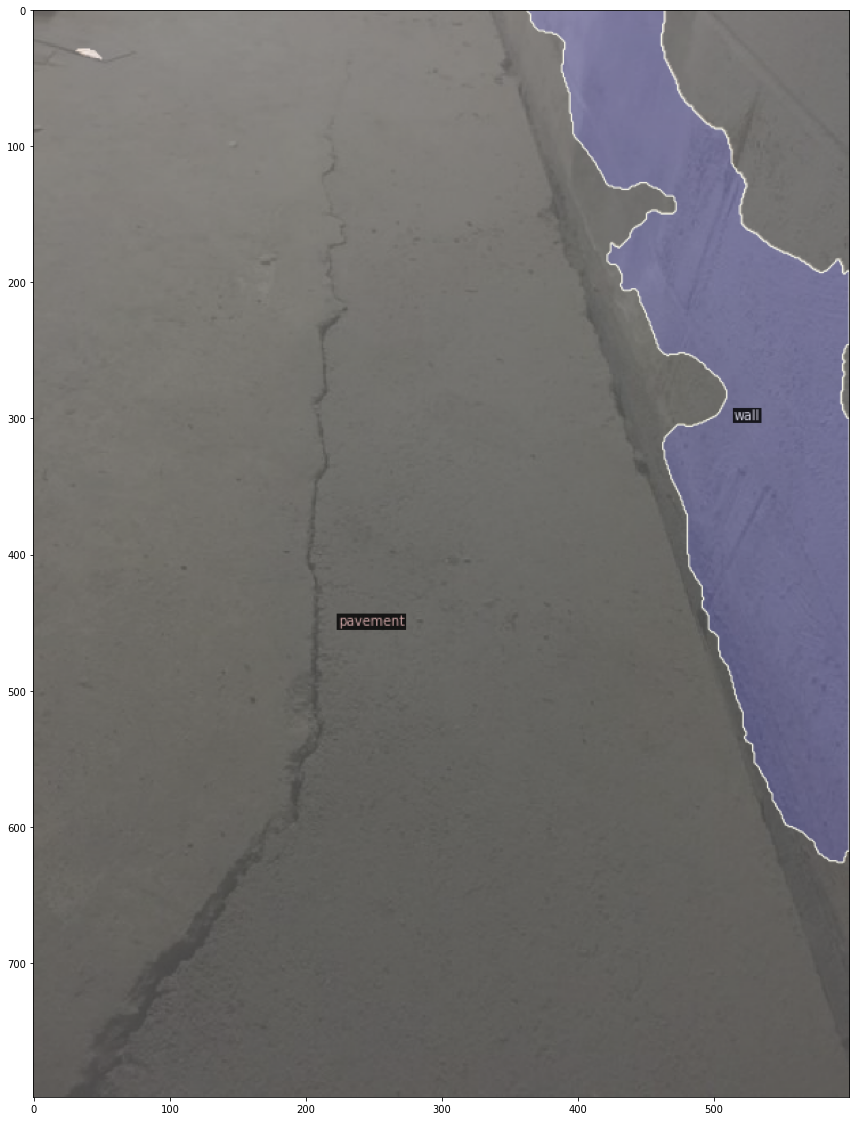

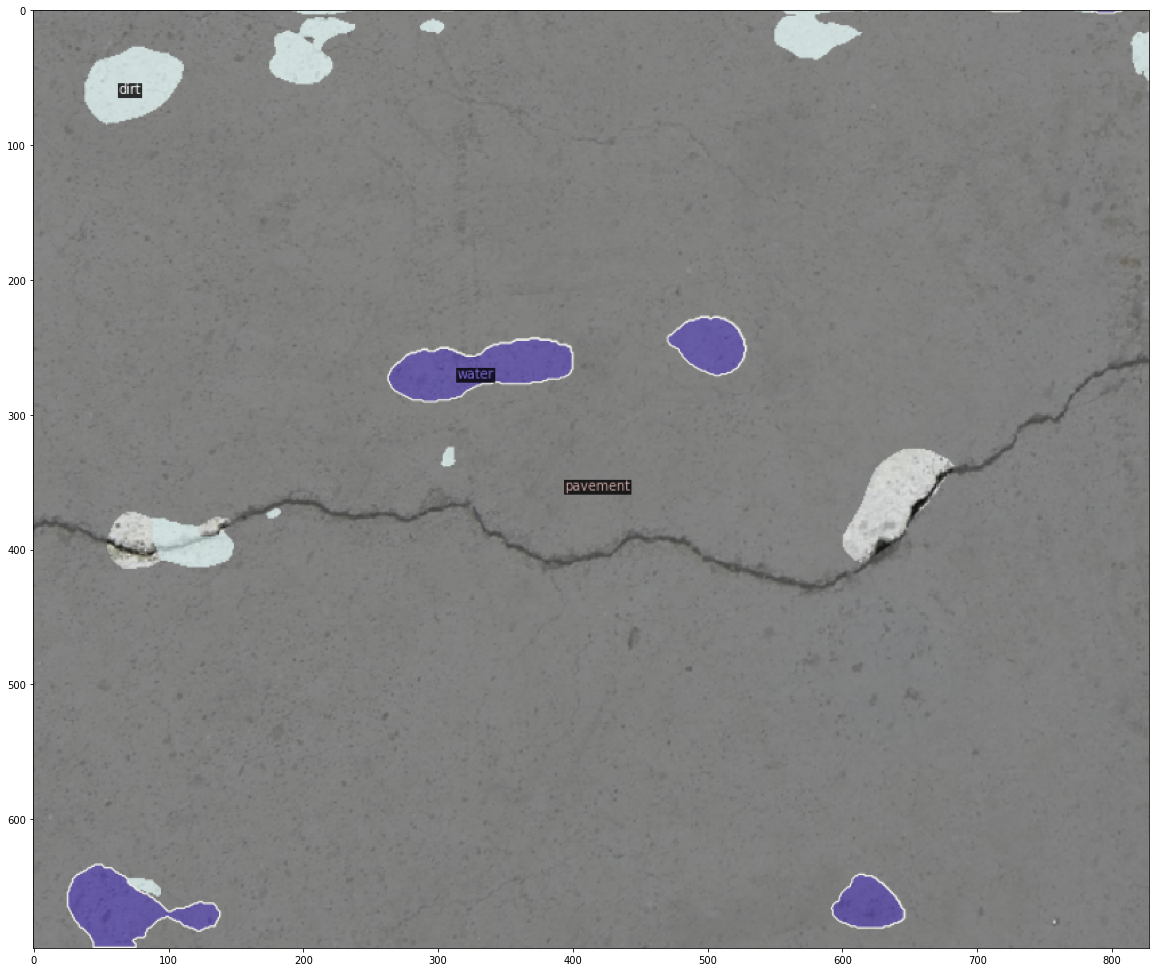

In [6]:
from detectron2.utils.visualizer import ColorMode
for d in random.sample(dataset_dicts_val, 3):
    im = cv2.imread(d["file_name"])
    # outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
    ids = [info['category_id'] for info in segments_info]
    classes = [meta_test.thing_classes[id] for id in ids]
    print(classes)
    plt.figure(figsize = (20,20))
    plt.imshow(out.get_image())

### Panoptic Visualization

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import os, sys
import numpy as np
import json

import PIL.Image as Image
import matplotlib.pyplot as plt
from skimage.segmentation import find_boundaries

from panopticapi.utils import IdGenerator, rgb2id

In [10]:
# whether from the PNG are used or new colors are generated
generate_new_colors = False

# json_file = './annotations/test.json'
json_file = './output/panoptic_val2017.json'
segmentations_folder = './panoptic'
img_folder = "/home/wenisch/Atom360/AI/Learning/data/dataset/images"
panoptic_coco_categories = './output/panoptic_val2017.json'


In [22]:
with open(json_file, 'r') as f:
    coco_d = json.load(f)

ann = np.random.choice(coco_d['annotations'])

with open(panoptic_coco_categories, 'r') as f:
    categories_list = json.load(f)
    categories_lists = categories_list['categories']
categegories = {category['id']: category for category in categories_lists}

# find input img that correspond to the annotation
img = None
for image_info in coco_d['images']:
    if image_info['id'] == ann['image_id']:
        try:
            img = np.array(
                Image.open(os.path.join(img_folder, image_info['file_name']))
            )
        except:
            print("Undable to find correspoding input image.")
        break

segmentation = np.array(
    Image.open(os.path.join(segmentations_folder, ann['file_name'])),
    dtype=np.uint8
)
segmentation_id = rgb2id(segmentation)
# find segments boundaries
boundaries = find_boundaries(segmentation_id, mode='thick')


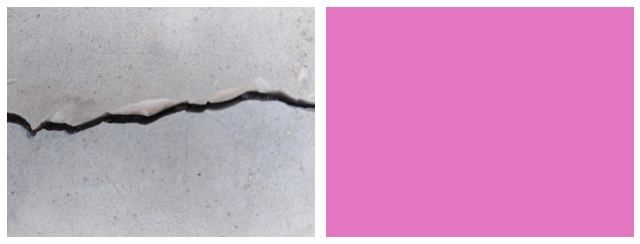

In [23]:
if generate_new_colors:
    segmentation[:, :, :] = 0
    color_generator = IdGenerator(categegories)
    for segment_info in ann['segments_info']:
        color = color_generator.get_color(segment_info['category_id'])
        mask = segmentation_id == segment_info['id']
        segmentation[mask] = color

# depict boundaries
segmentation[boundaries] = [0, 0, 0]

if img is None:
    plt.figure()
    plt.imshow(segmentation)
    plt.axis('off')
else:
    plt.figure(figsize=(9, 5))
    plt.subplot(121)
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(segmentation)
    plt.axis('off')
    plt.tight_layout()
plt.show()